In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
# import seaborn as sns
# from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import math

rng = np.random.default_rng(51)


In [4]:
df = pd.read_csv('letter-recognition.data', header=None)


In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [5]:
le = preprocessing.LabelEncoder()
for column_name in df.columns:
    df[column_name] = le.fit_transform(df[column_name])
y = df[0]
X = df.loc[:, df.columns != 0]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
X_train =  X_train.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
X_test = X_test.to_numpy()

N 1 acc=0.9284285714285714
N 2 acc=0.9255
N 3 acc=0.9752142857142857
N 4 acc=0.9874285714285714
Random Forest Accuracy: 0.987429


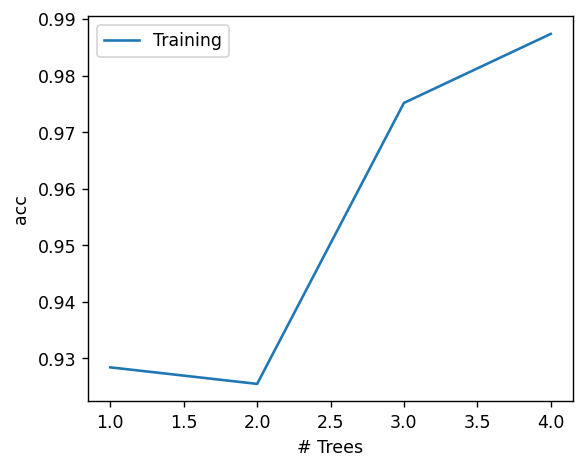

In [8]:
from random_forest import RandomForest
from decision_tree import DecisionTree
from random_forest import accuracy

n_trees = np.arange(1,5)
acc_train_rf = []
acc_test_rf = []

for n in n_trees:
    forest = RandomForest(n_trees=n)
    forest.fit(X_train, y_train)
    a = accuracy(forest, X_train, y_train)
    acc_train_rf.append(a)
    print(f'N {n} acc={a}')
    acc_test_rf.append(accuracy(forest, X_test, y_test))


rf_acc = np.array(acc_train_rf).max()
print('Random Forest Accuracy: {:0.6f}'.format(rf_acc))

f, ax = plt.subplots(figsize=(5,4), dpi=125)
ax.plot(n_trees, acc_train_rf, label='Training')
ax.set_xlabel('# Trees'); ax.set_ylabel('acc'); ax.legend();

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

# Получите предсказания
y_pred = forest.predict(X_test)


# Выведите отчет о классификации
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       232
           1       0.75      0.85      0.80       229
           2       0.93      0.88      0.90       201
           3       0.87      0.87      0.87       250
           4       0.87      0.87      0.87       238
           5       0.83      0.84      0.83       211
           6       0.90      0.82      0.86       230
           7       0.88      0.68      0.77       218
           8       0.85      0.91      0.88       221
           9       0.90      0.86      0.88       228
          10       0.78      0.85      0.81       188
          11       0.95      0.90      0.92       231
          12       0.94      0.93      0.93       252
          13       0.95      0.87      0.90       231
          14       0.89      0.88      0.88       218
          15       0.94      0.85      0.89       248
          16       0.78      0.92      0.84       253
   

Random Forest Accuracy: 0.881833
Random Forest (sklearn) Accuracy: 0.895000


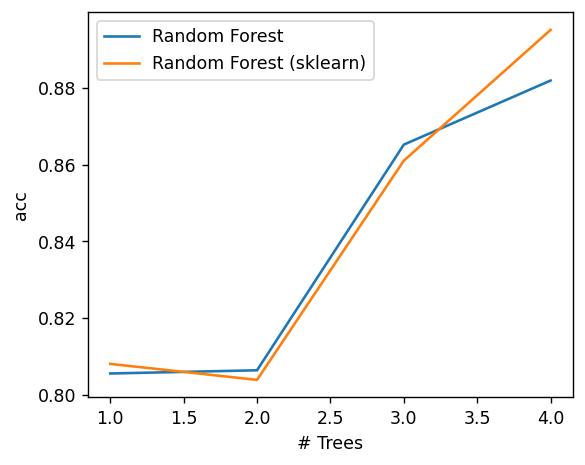

In [10]:
from sklearn.ensemble import RandomForestClassifier

acc_test_sk = []
for n in n_trees:
    forest_sc = RandomForestClassifier(n_estimators=n)
    forest_sc.fit(X_train, y_train)
    acc_test_sk.append(accuracy(forest_sc, X_test, y_test))


print('Random Forest Accuracy: {:0.6f}'.format(np.array(acc_test_rf).max()))
print('Random Forest (sklearn) Accuracy: {:0.6f}'.format(np.array(acc_test_sk).max()))

f, ax = plt.subplots(figsize=(5,4), dpi=125)
ax.plot(n_trees, acc_test_rf, label='Random Forest')
ax.plot(n_trees, acc_test_sk, label='Random Forest (sklearn)')
ax.set_xlabel('# Trees'); ax.set_ylabel('acc'); ax.legend();

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

# Получите предсказания
y_pred = forest_sc.predict(X_test)


# Выведите отчет о классификации
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       232
           1       0.73      0.93      0.82       229
           2       0.89      0.90      0.90       201
           3       0.80      0.93      0.86       250
           4       0.78      0.92      0.84       238
           5       0.81      0.88      0.84       211
           6       0.88      0.87      0.88       230
           7       0.82      0.72      0.77       218
           8       0.94      0.90      0.92       221
           9       0.91      0.89      0.90       228
          10       0.82      0.88      0.85       188
          11       0.96      0.91      0.94       231
          12       0.95      0.93      0.94       252
          13       0.90      0.88      0.89       231
          14       0.89      0.90      0.90       218
          15       0.94      0.87      0.90       248
          16       0.93      0.85      0.89       253
   

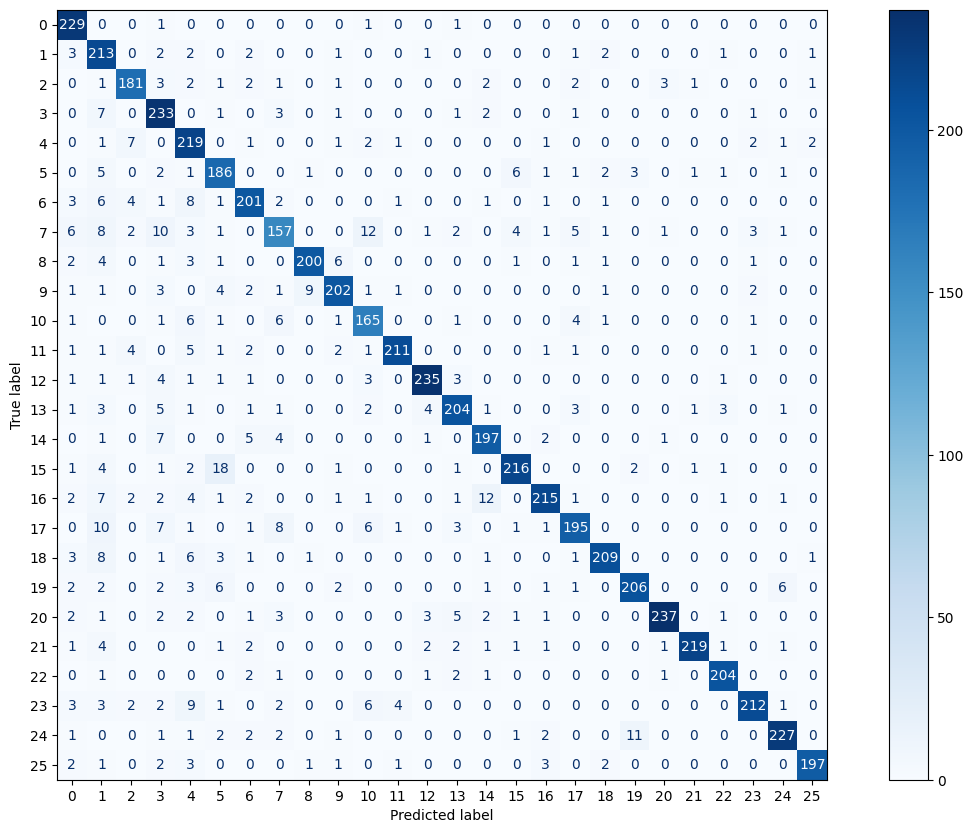

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_pred)

# Создайте объект ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(conf_matrix)

# Настройте размеры и стили ячеек
fig, ax = plt.subplots(figsize=(16, 10))
cm_display.plot(ax=ax, values_format=".4g", cmap='Blues')

# Выведите график
plt.show()